In [4]:
import numpy as np
from google.colab import files
import pandas as pd
import io

data_files = files.upload()

Saving house_price_us.txt to house_price_us.txt


In [10]:
data = pd.read_csv(io.BytesIO(data_files['house_price_us.txt']), names=['size','n_room','price'])
print(data)

X= np.c_[data['size'],data['n_room']]
Y=data['price']
m=len(data)

    size  n_room   price
0   2104       3  399900
1   1600       3  329900
2   2400       3  369000
3   1416       2  232000
4   3000       4  539900
5   1985       4  299900
6   1534       3  314900
7   1427       3  198999
8   1380       3  212000
9   1494       3  242500
10  1940       4  239999
11  2000       3  347000
12  1890       3  329999
13  4478       5  699900
14  1268       3  259900
15  2300       4  449900
16  1320       2  299900
17  1236       3  199900
18  2609       4  499998
19  3031       4  599000
20  1767       3  252900
21  1888       2  255000
22  1604       3  242900
23  1962       4  259900
24  3890       3  573900
25  1100       3  249900
26  1458       3  464500
27  2526       3  469000
28  2200       3  475000
29  2637       3  299900
30  1839       2  349900
31  1000       1  169900
32  2040       4  314900
33  3137       3  579900
34  1811       4  285900
35  1437       3  249900
36  1239       3  229900
37  2132       4  345000
38  4215       4  549000


In [25]:
X=(np.array(X)).reshape(m,2)
Y=(np.array(Y)).reshape(m,1)

print(X.shape, Y.shape)

(47, 2) (47, 1)


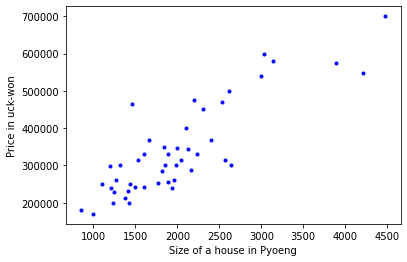

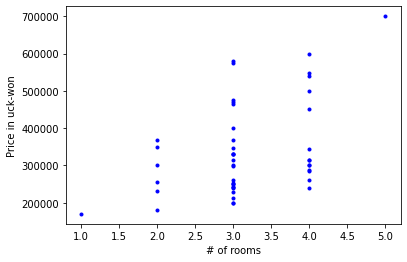

In [27]:
import matplotlib.pyplot as plt
plt.plot(X[:,0].reshape(-1),Y,'b.')
plt.xlabel('Size of a house in Pyoeng')
plt.ylabel('Price in uck-won')
plt.show()

plt.plot(X[:,1].reshape(-1),Y,'b.')
plt.xlabel('# of rooms')
plt.ylabel('Price in uck-won')
plt.show()

In [55]:
def featureNormalization(X):
  mu=np.mean(X,axis=0)
  std=np.std(X,axis=0)

  X_norm = (X-mu)/std

  return X_norm,mu,std

X, mu,std = featureNormalization(X)

def ComputeJ(t0,t1,t2,X,Y):
  m = len(X)
  X_b = np.c_[np.ones((m,1)),X]
  theta = np.array([t0,t1,t2])

  cost_vector = X_b.dot(theta) -Y

  cost_vector = cost_vector.reshape(-1)

  cost2 = np.square(cost_vector)

  cost_sum = np.sum(cost2) / (2*m)

  return cost_sum

In [56]:
X_b=np.c_[np.ones((m,1)),X]

learning_rate = 0.01
n_iter = 400

theta = np.random.rand(3,1)
gradients = np.zeros((3,1))

itr_arr = []
cost_arr = []

for i in range(n_iter):
  gradients = np.dot(np.transpose(X_b),(np.dot(X_b,theta)-Y)) /m
  theta = theta - learning_rate * gradients

  cost = ComputeJ(theta[0],theta[1],theta[2],X,Y)
  cost_arr.append(cost)
  itr_arr.append(i)
  
print(theta)

[[334302.07260009]
 [ 99411.49209047]
 [  3266.97150752]]


[[890.   2.]]
[[88817063.97612946]]


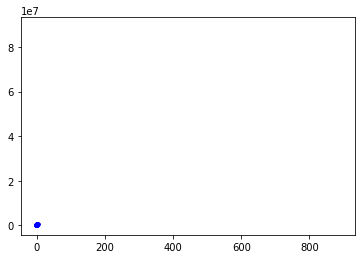

In [59]:
X_mine = np.array([[890,2]])
X_mine = (X_mine-mu)/std
print(X_mine)

X_mine_b = np.c_[np.ones((1,1)),X_mine]
y_predict = X_mine_b.dot(theta)

print(y_predict)



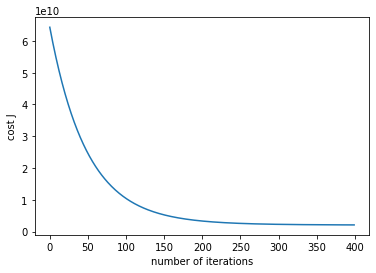

In [58]:
plt.plot(itr_arr, cost_arr)
plt.xlabel('number of iterations')
plt.ylabel('cost J')
plt.show()